## Week 4 Comprehensive Assignment: Predictive Modeling for Customer Churn

### Importing Libraries

In [2]:
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Loading Dataset
I have used pandas to read the dataset and prepocess it. 

In [3]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Data Exploration

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [8]:
df.shape

(7043, 21)

In [9]:
df.size

147903

In [10]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Totalcharges is given as object datatype but it is float datatype

In [12]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
#Checking for null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
df.duplicated().sum()

0

We have 2 types of features in the dataset: categorical (two or more values and without any order) and numerical. Most of the feature names are self-explanatory, except for:

Partner: whether the customer has a partner or not (Yes, No),

Dependents: whether the customer has dependents or not (Yes, No),

OnlineBackup: whether the customer has online backup or not (Yes, No, No internet service),

tenure: number of months the customer has stayed with the company,

MonthlyCharges: the amount charged to the customer monthly,

TotalCharges: the total amount charged to the customer.

There are 7043 customers in the dataset and 19 features without customerID (non-informative) and Churn column (target variable). Most of the categorical features have 4 or less unique values.

### Data Cleaning

Totalcharges is given as object datatype but it is float datatype. Let fix it here.

In [18]:
df['TotalCharges'].dtype

dtype('O')

In [19]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')

In [20]:
df['TotalCharges'].dtype

dtype('float64')

In [21]:
categorical_features = [
    "gender",
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod",
]
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
target = "Churn"

In [22]:
df.skew(numeric_only= True)

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.961642
dtype: float64

In [23]:
df.corr(numeric_only= True)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


### Feature Distribution
I have ploted distributions for numerical and categorical features to check for outliers and compare feature distributions with target variable.

#### Numerical Feature Distribution 
In Numeric Data mean, standard deviation, etc. don't show us spikes, shapes of distributions and it is hard to observe outliers with it. That is why we use histograms.

In [24]:
df[numerical_features].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

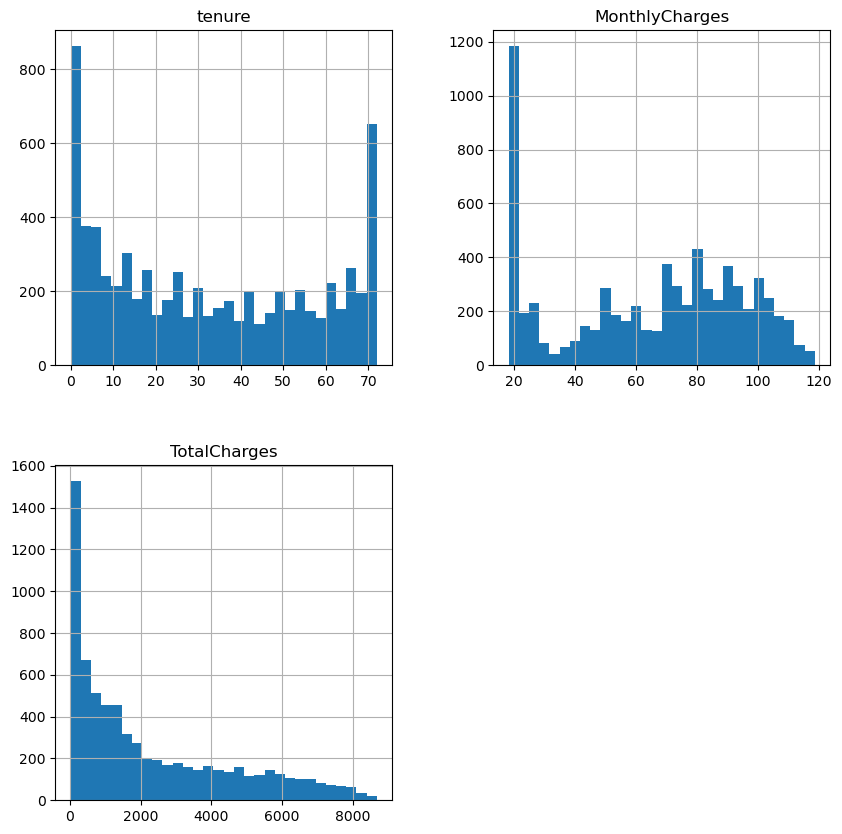

In [26]:
df[numerical_features].hist(bins=30, figsize=(10, 10))

If we look at distributions of numerical features in relation to the target variable. We can observe that the greater TotalCharges and tenure are the less is the probability of churn.

#### Categorical Feature Distribution
To analyze categorical features, I used bar charts.

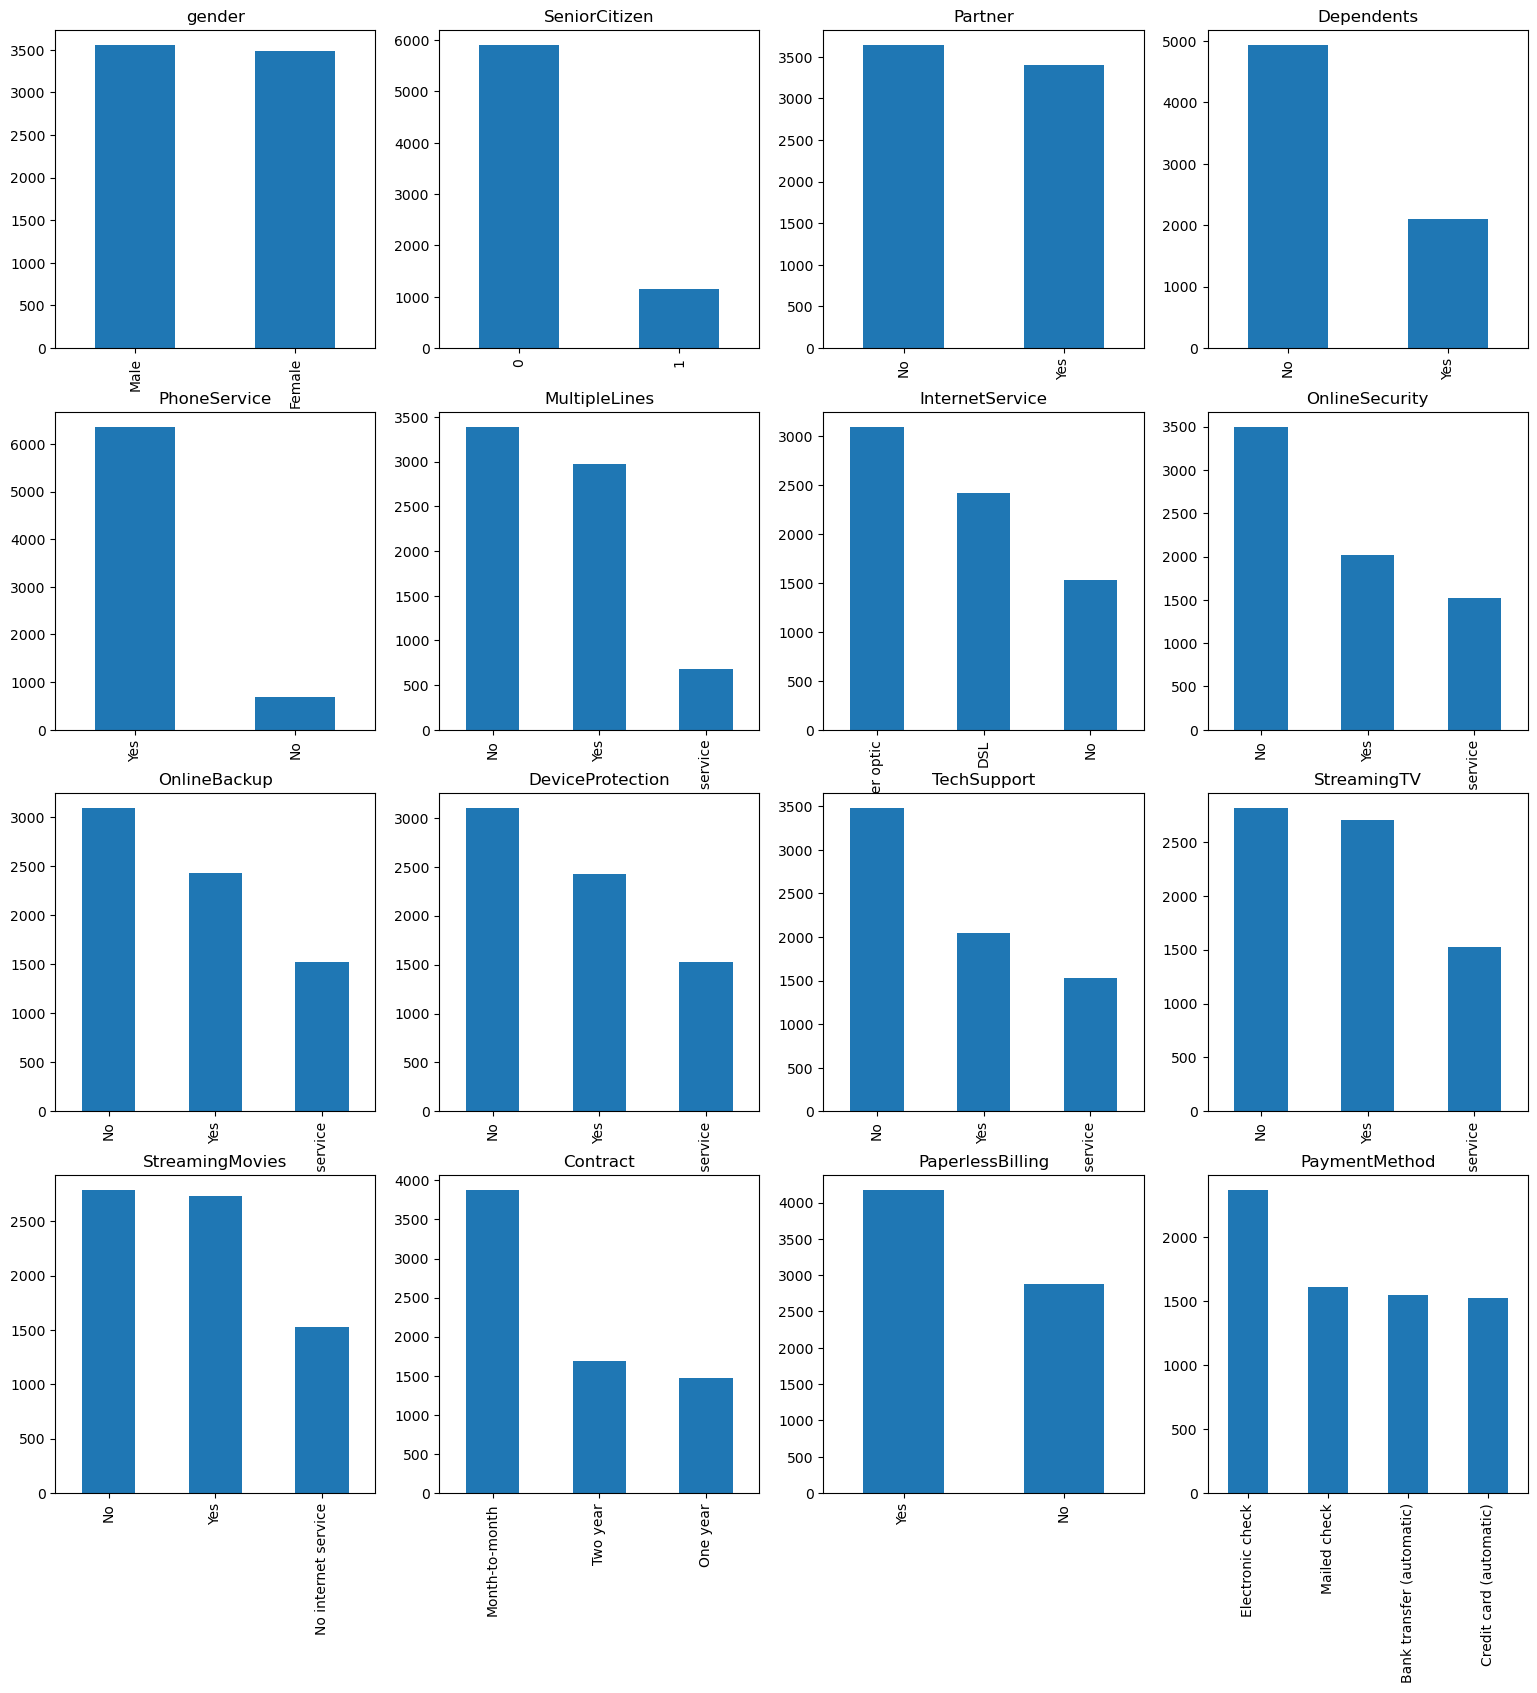

In [27]:
ROWS, COLS = 4, 4
fig, ax = plt.subplots(ROWS,COLS, figsize=(19,19))
row, col = 0, 0,
for i, categorical_feature in enumerate(categorical_features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    df[categorical_feature].value_counts().plot(kind='bar', ax=ax[row, col]).set_title(categorical_feature)

We can observe that Senior citizens and customers without phone service are less represented in the data.

#### Target Variable Distribution

Text(0.5, 1.0, 'churned')

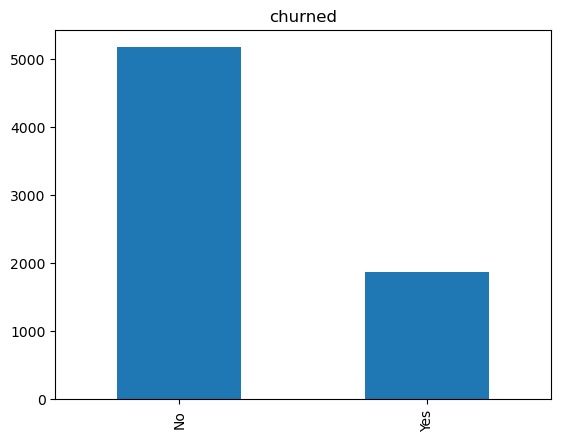

In [28]:
df[target].value_counts().plot(kind='bar').set_title('churned')

Target variable distribution shows that we are dealing with an imbalanced problem as there are many more non-churned as compare to churned users. The model would achieve high accuracy as it would mostly predict majority class - users who didn't churn in our example.

Few things we can do to minimize the influence of imbalanced dataset:

resample data, 
collect more samples,
use precision and recall as accuracy metrics.

### Data Cleaning and Data Trasforming

In [34]:
df.drop(['customerID'],axis = 1,inplace = True)
#CustomerID is not important column for us 

KeyError: "['customerID'] not found in axis"

In [35]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### One Hot Encoding for Categorical Column 

In [37]:
df1=pd.get_dummies(data=df,columns=['gender', 'Partner', 'Dependents', 
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'], drop_first=True)

In [38]:
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [39]:
df1.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

In [40]:
# Rearranging Columns

df1 = df1[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
        'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check','Churn_Yes']]

In [41]:
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [42]:
df1.shape

(7043, 31)

In [43]:
# The imputer will replace missing values with the mean of the non-missing values for the respective columns

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

df1.TotalCharges = imputer.fit_transform(df1["TotalCharges"].values.reshape(-1, 1))

### Feature Scaling

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(df1.drop(['Churn_Yes'],axis = 1))
scaled_features = scaler.transform(df1.drop('Churn_Yes',axis = 1))

### Feature Selection

In [45]:
from sklearn.model_selection import train_test_split
X = scaled_features
Y = df1['Churn_Yes']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=44)

### Predicition using Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score ,confusion_matrix

dtc = DecisionTreeClassifier()

dtc.fit(X_train, Y_train)
y_pred_dtc = dtc.predict(X_test)

In [47]:
print(classification_report(Y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1557
           1       0.46      0.48      0.47       556

    accuracy                           0.72      2113
   macro avg       0.64      0.64      0.64      2113
weighted avg       0.72      0.72      0.72      2113



AUC = 0.6404442919652718


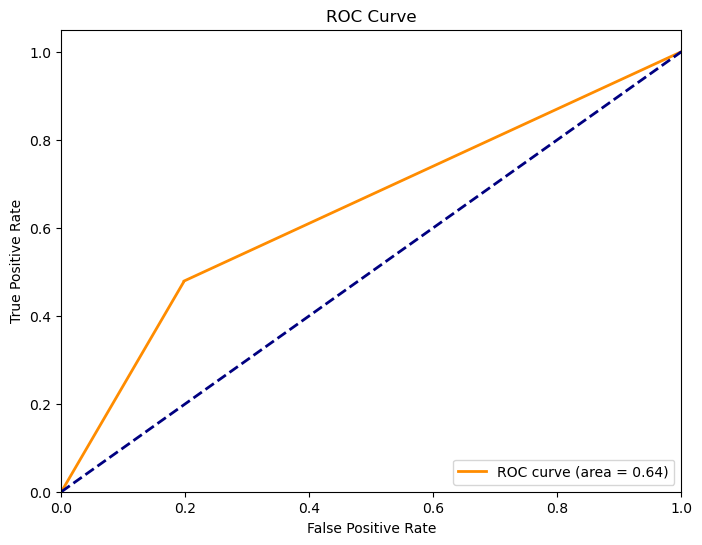

In [56]:
from sklearn.metrics import roc_curve, auc

#Calculate the probabilities for the positive class (class 1)
y_prob_dtc = dtc.predict_proba(X_test)[:, 1]

#Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_prob_dtc)

#Calculate the AUC (Area Under the ROC Curve)
roc_auc = auc(fpr, tpr)
print("AUC =" , roc_auc)

#Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Prediction using KNN Classifier

In [57]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=30)

In [58]:
pred_knn = knn.predict(X_test)

In [59]:
print(classification_report(Y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1557
           1       0.62      0.55      0.58       556

    accuracy                           0.79      2113
   macro avg       0.73      0.71      0.72      2113
weighted avg       0.79      0.79      0.79      2113



#### Finding error rate with different numbers of K-neighbors

In [60]:
error_rate= []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Error Rate')

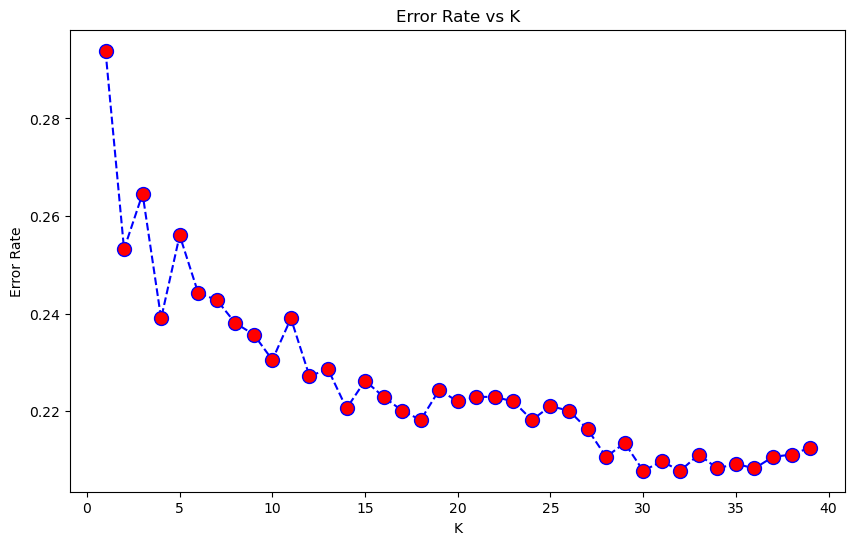

In [61]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color = 'blue',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

So, we can say that between 30 to 35 K-neighbors error rate is low

### Prediction using Neural Network 

In [65]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [68]:
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  #Input layer
    layers.Dense(128, activation='relu'),     #Hidden layer with 128 neurons and ReLU activation
    layers.Dense(64, activation='relu'),      #Hidden layer with 64 neurons and ReLU activation
    layers.Dense(1, activation='sigmoid')     #Output layer with 1 neuron and sigmoid activation for binary classification
])

#Compile the model
model.compile(optimizer='adam',           #Optimizer
              loss='binary_crossentropy', #Loss function for binary classification
              metrics=['accuracy'])        #Evaluation metric (accuracy)

In [69]:
#Train the model
history = model.fit(X_train, Y_train, 
                    epochs=10,            #Number of training epochs
                    batch_size=32,        #Mini-batch size
                    validation_split=0.2) #Validation split (optional)

Epoch 1/10
141/141 [==============================] - 1s 3ms/step - loss: 0.4540 - accuracy: 0.7781 - val_loss: 0.4212 - val_accuracy: 0.8012
Epoch 2/10
141/141 [==============================] - 0s 2ms/step - loss: 0.4252 - accuracy: 0.7965 - val_loss: 0.4247 - val_accuracy: 0.7879
Epoch 3/10
141/141 [==============================] - 0s 2ms/step - loss: 0.4180 - accuracy: 0.7990 - val_loss: 0.4119 - val_accuracy: 0.8039
Epoch 4/10
141/141 [==============================] - 0s 2ms/step - loss: 0.4130 - accuracy: 0.8034 - val_loss: 0.4161 - val_accuracy: 0.7977
Epoch 5/10
141/141 [==============================] - 0s 2ms/step - loss: 0.4051 - accuracy: 0.8110 - val_loss: 0.4143 - val_accuracy: 0.8039
Epoch 6/10
141/141 [==============================] - 0s 2ms/step - loss: 0.4014 - accuracy: 0.8138 - val_loss: 0.4125 - val_accuracy: 0.8057
Epoch 7/10
141/141 [==============================] - 0s 2ms/step - loss: 0.3958 - accuracy: 0.8138 - val_loss: 0.4162 - val_accuracy: 0.8101
Epoch 

In [70]:
#Evaluate the model on test dataset
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

45/45 [==============================] - 0s 1ms/step - loss: 0.4117 - accuracy: 0.8048
Test Loss: 0.4117
Test Accuracy: 0.8048


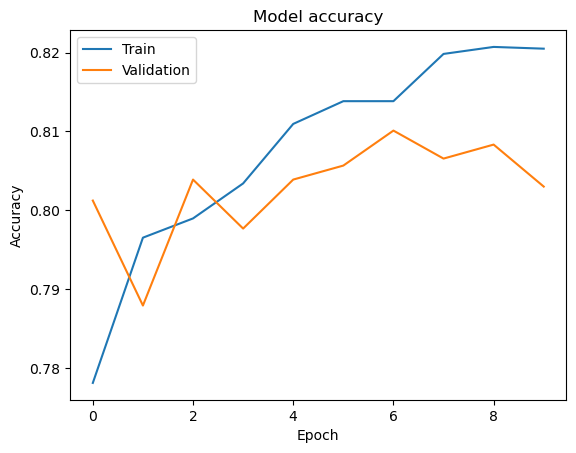

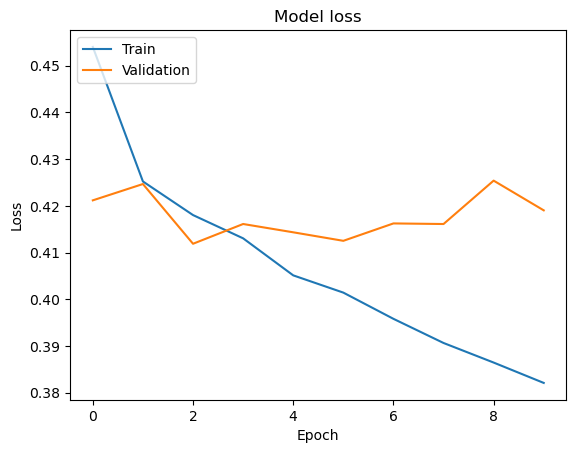

In [72]:
#Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Prediction using Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [76]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [77]:
y_pred = rf_classifier.predict(X_test)

In [83]:
# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
class_report = classification_report(Y_test, y_pred)
print('Classification Report:\n', class_report)

# Generate a confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

Accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.47      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409

Confusion Matrix:
 [[943  93]
 [199 174]]


#### Hyperparameter tuning for Random Forest

In [85]:
from sklearn.model_selection import GridSearchCV

#Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],           #Number of trees in the forest
    'max_depth': [None, 10, 20, 30],          #Maximum depth of trees
    'min_samples_split': [2, 5, 10],          #Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],            #Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'], #Number of features to consider for best split
}

#Create the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

#Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

#Fit the grid search to the data
grid_search.fit(X_train, Y_train)

#Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

#Use the best model for prediction
best_rf_classifier = grid_search.best_estimator_
y_pred = best_rf_classifier.predict(X_test)

#Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

classification_rep = classification_report(Y_test, y_pred)
print("Classification Report:\n", classification_rep)

confusion_mat = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
264 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\admin\anaconda3\Lib\site-packa

Best Hyperparameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
Accuracy: 0.8133427963094393
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.70      0.52      0.59       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409

Confusion Matrix:
 [[953  83]
 [180 193]]


### Prediction using XGBoost

In [87]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/32/10/4689bda37403f7dd029d550c4446e0097c2f33b8ae877b235e76d5c49bc2/xgboost-2.0.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.2/99.7 MB 5.0 MB/s eta 0:00:21
   ---------------------------------------- 0.4/99.7 MB 4.9 MB/s eta 0:00:21
   ---------------------------------------- 0.7/99.7 MB 5.2 MB/s eta 0:00:19
   ---------------------------------------- 0.9/99.7 MB 5.4 MB/s eta 0:00:19
   ---------------------------------------- 1.2/99.7 MB 5.6 MB/s eta 0:00:18
    --------------------------------------- 1.5/99.7 MB 5.5 MB/s eta 0:00:18
    --------------------------------------- 1.7/99.7 MB 5.8 MB/s eta 0:00:17
    --------------------------------------- 2.0/99.7 MB 5.5 MB/s eta 0:00:18
    --------------------------------------- 2.3/99.7 MB 5.5 MB/s eta 0:00:18
   - ---------------------------

In [88]:
import xgboost as xgb

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Create an XGBoost Classifier
model = xgb.XGBClassifier(
    objective='binary:logistic',  #For binary classification
    n_estimators=100,             #Number of boosting rounds (trees)
    max_depth=3,                  #Maximum depth of each tree
    learning_rate=0.1,            #Learning rate (eta)
    subsample=1.0,                #Fraction of samples used for each tree
    colsample_bytree=1.0,         #Fraction of features used for each tree
    random_state=42               #Random seed for reproducibility
)

#Train the XGBoost Classifier
model.fit(X_train, Y_train)

#Make predictions on the test data
y_pred = model.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
confusion = confusion_matrix(Y_test, y_pred)
report = classification_report(Y_test, y_pred)

#Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion}")
print(f"Classification Report:\n{report}")

Accuracy: 0.8147622427253371
Confusion Matrix:
[[939  97]
 [164 209]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.56      0.62       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409



#### So, We are getting highest accuracy from Random Forest with hyperparameter tuning and XGBoost 